<a href="https://colab.research.google.com/github/moist234/ECON3916-Statistical-Machine-Learning/blob/main/lab-07/Lab7_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

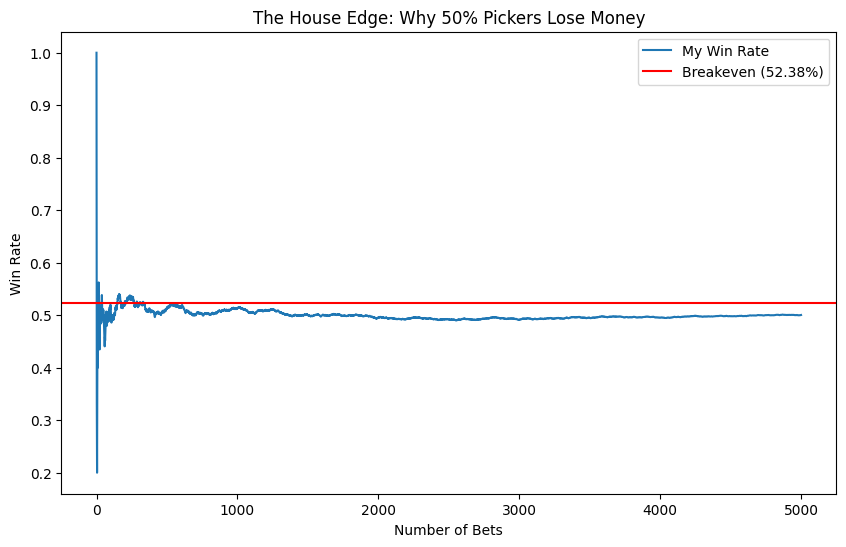

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup
true_skill = 0.50       # You win 50% of the time
breakeven = 0.5238      # -110 odds requires 52.38% to profit
n_bets = 5000           # Simulating a full season

# 2. Simulate
outcomes = np.random.choice([0,1], size=n_bets, p=(1-true_skill,true_skill))

cumulative_win_rate = np.cumsum(outcomes) / np.arange(1, n_bets + 1)


# 3. Plot
plt.figure(figsize=(10,6))
plt.plot(cumulative_win_rate, label="My Win Rate")
plt.axhline(breakeven, color='red', label="Breakeven (52.38%)")
plt.legend()
plt.title("The House Edge: Why 50% Pickers Lose Money")
plt.xlabel("Number of Bets")
plt.ylabel("Win Rate")
plt.show()

Sampling Error Audit:
Sample 1: Mean = 34.72% | Error = -0.55%
Sample 2: Mean = 36.03% | Error = +0.76%
Sample 3: Mean = 35.16% | Error = -0.11%


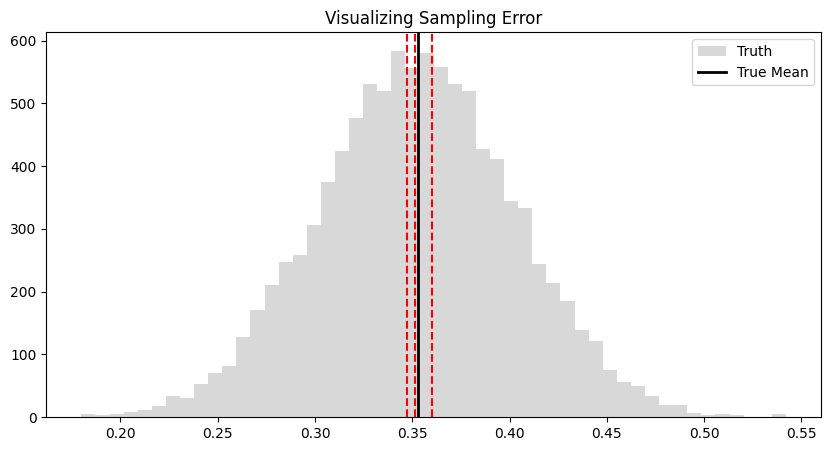

In [53]:
# 1. The "Unknown" Truth
true_mu = 0.3527  # Matching the "True Population Mean"

# 2. Simulate 3 distinct "Samples" (e.g., 3 different users)
samples = []
print(f"Sampling Error Audit:")

for i in range(3):
    # Draw 50 random bets
    sample = np.random.normal(true_mu, 0.05, 50)

    # Calculate stats
    x_bar = np.mean(sample)
    error = x_bar - true_mu   # The Formula: Error = x_bar - mu

    print(f"Sample {i+1}: Mean = {x_bar:.2%} | Error = {error:+.2%}")
    samples.append(x_bar)

# 3. Quick Visual Check
plt.figure(figsize=(10,5))
plt.hist(np.random.normal(true_mu, 0.05, 10000), bins=50, alpha=0.3, color='gray', label='Truth')
for mean in samples:
    plt.axvline(mean, color='red', linestyle='--') # Our Samples
plt.axvline(true_mu, color='black', linewidth=2, label='True Mean')
plt.title("Visualizing Sampling Error")
plt.legend()
plt.show()

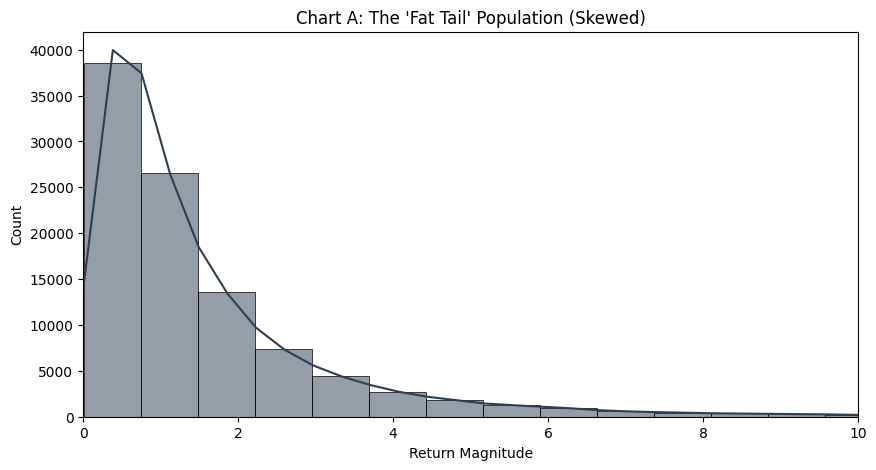

In [54]:
import seaborn as sns

# 1. Define the "Crypto Universe" (Population)
population_data = np.random.lognormal(mean=0, sigma=1, size=100000)

# 2. Visualize the Chaos
plt.figure(figsize=(10, 5))
sns.histplot(population_data, bins=100, kde=True, color='#2c3e50')
plt.xlim(0, 10)  # Crop to see the shape clearly
plt.title("Chart A: The 'Fat Tail' Population (Skewed)")
plt.xlabel("Return Magnitude")
plt.show()

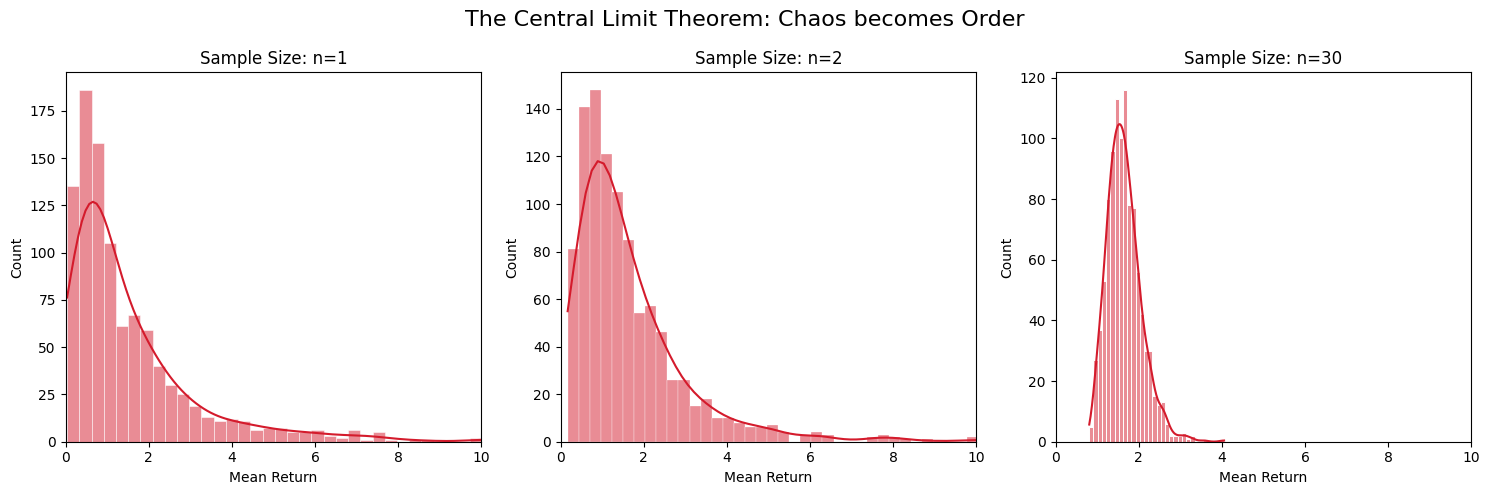

In [55]:
# Setup: Compare 3 sample sizes to match the slide
sample_sizes = [1, 2, 30]
simulations = 1000

plt.figure(figsize=(15, 5))

for i, n in enumerate(sample_sizes):
    # 1. The Loop: Calculate 1000 averages
    means = []
    for _ in range(simulations):
        sample = np.random.choice(population_data, size=n)
        means.append(np.mean(sample))

    # 2. Plotting
    plt.subplot(1, 3, i+1)
    sns.histplot(means, kde=True, color='#d41b2c', edgecolor='white')
    plt.title(f"Sample Size: n={n}")
    plt.xlabel("Mean Return")
    plt.xlim(0, 10)

plt.suptitle("The Central Limit Theorem: Chaos becomes Order", fontsize=16)
plt.tight_layout()
plt.show()

In [56]:
# 1. Setup: Two Populations, same variance, vastly different sizes
std_dev = 15000  # Variation in spending
n = 100          # We only sample 100 users (The "Teaspoon")

# 2. Calculate Margin of Error (1.96 * sigma / sqrt(n))
# Notice: Big 'N' (Population Size) is NOT in this formula!
margin_error = 1.96 * std_dev / np.sqrt(n)
margin_error_2 = 1.96 * std_dev / np.sqrt(100000)

# 3. Print Results
print(f"--- The Soup Analogy ---")
print(f"Population: 1,000 users   | Margin of Error: ±${margin_error:,.2f}")
print(f"Population: 1,000,000 users | Margin of Error: ±${margin_error:,.2f}")
print(f"Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.")

--- The Soup Analogy ---
Population: 1,000 users   | Margin of Error: ±$2,940.00
Population: 1,000,000 users | Margin of Error: ±$2,940.00
Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.


In [57]:
# Metric: LTV/CAC Ratio (Target > 3.0)
mean_val = 4.0
n_samples = 50

# Compare Stable (A) vs Volatile (B) Companies
sigma_A = 0.5  # Stable
sigma_B = 6.0  # Volatile

moe_A = 1.96 * sigma_A / np.sqrt(n_samples)
moe_B = 1.96 * sigma_B / np.sqrt(n_samples)

print("\n--- VC Audit: Series C Benchmark (> 3.0) ---")

print(f"Startup A (Stable):")
print(f"   95% CI: [{mean_val - moe_A:.1f}, {mean_val + moe_A:.1f}]")
print(f"   Decision: INVEST. (Lower bound > 3.0)")

print(f"\nStartup B (Volatile):")
print(f"   95% CI: [{mean_val - moe_B:.1f}, {mean_val + moe_B:.1f}]")
print(f"   Decision: PASS. (Lower bound implies potential loss)")


--- VC Audit: Series C Benchmark (> 3.0) ---
Startup A (Stable):
   95% CI: [3.9, 4.1]
   Decision: INVEST. (Lower bound > 3.0)

Startup B (Volatile):
   95% CI: [2.3, 5.7]
   Decision: PASS. (Lower bound implies potential loss)
